<a href="https://colab.research.google.com/github/ucaokylong/Tabular_data/blob/main/TimeSerires_predict_temp_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!gdown --id 1TMBmtAse820VKptE4PI0g_Cuf5cp4VDy

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TMBmtAse820VKptE4PI0g_Cuf5cp4VDy
To: /content/weatherHistory_univariate.csv
100% 4.07M/4.07M [00:00<00:00, 275MB/s]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('weatherHistory_univariate.csv')
df.head(10)

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
5,2006-04-01 05:00:00.000 +0200,9.222222
6,2006-04-01 06:00:00.000 +0200,7.733333
7,2006-04-01 07:00:00.000 +0200,8.772222
8,2006-04-01 08:00:00.000 +0200,10.822222
9,2006-04-01 09:00:00.000 +0200,13.772222


In [3]:
df = df.sort_values('Formatted Date')
df.head(10)

,Formatted Date,Temperature (C)
2880,2006-01-01 00:00:00.000 +0100,0.577778
2881,2006-01-01 01:00:00.000 +0100,1.161111
2882,2006-01-01 02:00:00.000 +0100,1.666667
2883,2006-01-01 03:00:00.000 +0100,1.711111
2884,2006-01-01 04:00:00.000 +0100,1.183333
2885,2006-01-01 05:00:00.000 +0100,1.205556
2886,2006-01-01 06:00:00.000 +0100,2.222222
2887,2006-01-01 07:00:00.000 +0100,2.072222
2888,2006-01-01 08:00:00.000 +0100,2.200000
2889,2006-01-01 09:00:00.000 +0100,2.733333


In [4]:
# Converting the dt column to datetime object 
df['Formatted Date'] = [pd.to_datetime(x) for x in df['Formatted Date']]
df.head(10)

,Formatted Date,Temperature (C)
2880,2006-01-01 00:00:00+01:00,0.577778
2881,2006-01-01 01:00:00+01:00,1.161111
2882,2006-01-01 02:00:00+01:00,1.666667
2883,2006-01-01 03:00:00+01:00,1.711111
2884,2006-01-01 04:00:00+01:00,1.183333
2885,2006-01-01 05:00:00+01:00,1.205556
2886,2006-01-01 06:00:00+01:00,2.222222
2887,2006-01-01 07:00:00+01:00,2.072222
2888,2006-01-01 08:00:00+01:00,2.200000
2889,2006-01-01 09:00:00+01:00,2.733333


In [5]:
# Creating the data column
df['date'] = [x.date() for x in df['Formatted Date']]
df.head(7)

,Formatted Date,Temperature (C),date
2880,2006-01-01 00:00:00+01:00,0.577778,2006-01-01
2881,2006-01-01 01:00:00+01:00,1.161111,2006-01-01
2882,2006-01-01 02:00:00+01:00,1.666667,2006-01-01
2883,2006-01-01 03:00:00+01:00,1.711111,2006-01-01
2884,2006-01-01 04:00:00+01:00,1.183333,2006-01-01
2885,2006-01-01 05:00:00+01:00,1.205556,2006-01-01
2886,2006-01-01 06:00:00+01:00,2.222222,2006-01-01


In [6]:
df['date'] = [x.date() for x in df['Formatted Date']]
df['month'] = [x.month for x in df['Formatted Date']]
df['year'] = [x.year for x in df['Formatted Date']]
df['day'] = [x.day for x in df['Formatted Date']]
df['hour'] = [x.hour for x in df['Formatted Date']]
df.head(7)

,Formatted Date,Temperature (C),date,month,year,day,hour
2880,2006-01-01 00:00:00+01:00,0.577778,2006-01-01,1,2006,1,0
2881,2006-01-01 01:00:00+01:00,1.161111,2006-01-01,1,2006,1,1
2882,2006-01-01 02:00:00+01:00,1.666667,2006-01-01,1,2006,1,2
2883,2006-01-01 03:00:00+01:00,1.711111,2006-01-01,1,2006,1,3
2884,2006-01-01 04:00:00+01:00,1.183333,2006-01-01,1,2006,1,4
2885,2006-01-01 05:00:00+01:00,1.205556,2006-01-01,1,2006,1,5
2886,2006-01-01 06:00:00+01:00,2.222222,2006-01-01,1,2006,1,6


In [7]:
df['day_cos'] = [np.cos(x * (2 * np.pi / 24)) for x in df['hour']]
df['day_sin'] = [np.sin(x * (2 * np.pi / 24)) for x in df['hour']]
df.head(7)

,Formatted Date,Temperature (C),date,month,year,day,hour,day_cos,day_sin
2880,2006-01-01 00:00:00+01:00,0.577778,2006-01-01,1,2006,1,0,1.000000e+00,0.000000
2881,2006-01-01 01:00:00+01:00,1.161111,2006-01-01,1,2006,1,1,9.659258e-01,0.258819
2882,2006-01-01 02:00:00+01:00,1.666667,2006-01-01,1,2006,1,2,8.660254e-01,0.500000
2883,2006-01-01 03:00:00+01:00,1.711111,2006-01-01,1,2006,1,3,7.071068e-01,0.707107
2884,2006-01-01 04:00:00+01:00,1.183333,2006-01-01,1,2006,1,4,5.000000e-01,0.866025
2885,2006-01-01 05:00:00+01:00,1.205556,2006-01-01,1,2006,1,5,2.588190e-01,0.965926
2886,2006-01-01 06:00:00+01:00,2.222222,2006-01-01,1,2006,1,6,6.123234e-17,1.000000


In [8]:
df['timestamp'] = [x.timestamp() for x in df['Formatted Date']]
df.head(7)

,Formatted Date,Temperature (C),date,month,year,day,hour,day_cos,day_sin,timestamp
2880,2006-01-01 00:00:00+01:00,0.577778,2006-01-01,1,2006,1,0,1.000000e+00,0.000000,1.136070e+09
2881,2006-01-01 01:00:00+01:00,1.161111,2006-01-01,1,2006,1,1,9.659258e-01,0.258819,1.136074e+09
2882,2006-01-01 02:00:00+01:00,1.666667,2006-01-01,1,2006,1,2,8.660254e-01,0.500000,1.136077e+09
2883,2006-01-01 03:00:00+01:00,1.711111,2006-01-01,1,2006,1,3,7.071068e-01,0.707107,1.136081e+09
2884,2006-01-01 04:00:00+01:00,1.183333,2006-01-01,1,2006,1,4,5.000000e-01,0.866025,1.136084e+09
2885,2006-01-01 05:00:00+01:00,1.205556,2006-01-01,1,2006,1,5,2.588190e-01,0.965926,1.136088e+09
2886,2006-01-01 06:00:00+01:00,2.222222,2006-01-01,1,2006,1,6,6.123234e-17,1.000000,1.136092e+09


In [9]:
# Seconds in day 
s = 24 * 60 * 60 
# Seconds in year 
year = (365.25) * s

df['year_cos'] = [np.cos((x) * (2 * np.pi / year)) for x in df['timestamp']]
df['year_sin'] = [np.sin((x) * (2 * np.pi / year)) for x in df['timestamp']]
df.head(7)

,Formatted Date,Temperature (C),date,month,year,day,hour,day_cos,day_sin,timestamp,year_cos,year_sin
2880,2006-01-01 00:00:00+01:00,0.577778,2006-01-01,1,2006,1,0,1.000000e+00,0.000000,1.136070e+09,1.000000,-7.167676e-04
2881,2006-01-01 01:00:00+01:00,1.161111,2006-01-01,1,2006,1,1,9.659258e-01,0.258819,1.136074e+09,1.000000,-8.817457e-15
2882,2006-01-01 02:00:00+01:00,1.666667,2006-01-01,1,2006,1,2,8.660254e-01,0.500000,1.136077e+09,1.000000,7.167676e-04
2883,2006-01-01 03:00:00+01:00,1.711111,2006-01-01,1,2006,1,3,7.071068e-01,0.707107,1.136081e+09,0.999999,1.433535e-03
2884,2006-01-01 04:00:00+01:00,1.183333,2006-01-01,1,2006,1,4,5.000000e-01,0.866025,1.136084e+09,0.999998,2.150301e-03
2885,2006-01-01 05:00:00+01:00,1.205556,2006-01-01,1,2006,1,5,2.588190e-01,0.965926,1.136088e+09,0.999996,2.867067e-03
2886,2006-01-01 06:00:00+01:00,2.222222,2006-01-01,1,2006,1,6,6.123234e-17,1.000000,1.136092e+09,0.999994,3.583831e-03


## Prepare data

In [10]:
INPUT_SIZE = 48 # Dùng `input_size` giờ trước
LABEL_SIZE = 6  # Để dự đoán nhiệt độ trong `label_size` giờ
BATCH_SIZE = 32
FEATURE_FINAL = ['Temperature (C)', 'day_cos', 'day_sin', 'year_cos', 'year_sin']
label_name = 'Temperature (C)'

In [ ]:
def slicing_window(df, df_start_idx, df_end_idx, input_size, label_size, label_name):
    features = [] # Khai báo list dùng để lưu trữ các X
    labels = []   # Khai báo list dùng để lưu trữ các y

    window_size = input_size + label_size # Tính kích thước của window

    # Nếu df_end_idx = chỉ mục cuối cùng bảng dữ liệu, cần phải dời xuống 1 khoảng = window size 
    if df_end_idx == None:
        df_end_idx = len(df) - window_size 
    
    # Duyệt qua từng mẫu dữ liệu
    for idx in range(df_start_idx, df_end_idx):
        feature_end_idx = idx + input_size # Tính chỉ mục kết thúc của X
        label_start_idx = idx + window_size - label_size # Tính chỉ mục bắt đầu của y

        feature = df[idx:feature_end_idx] # Lấy X
        label = df[label_name][label_start_idx:(idx+window_size)] # Lấy y

        features.append(feature) 
        labels.append(label)

    # Chuyển list thành np.ndarrray
    features = np.array(features)
    print(features.shape)
    labels = np.array(labels)

    return features, labels

In [ ]:
dataset_length = len(df) # Số lượng mẫu dữ liệu trong DataFrame
TRAIN_SIZE = 0.7         # Tỉ lệ kích thước tập train
VAL_SIZE = 0.2           # Tỉ lệ kích thước tập val

# Đổi tỉ lệ thành chỉ mục
TRAIN_END_IDX = int(TRAIN_SIZE * dataset_length) 
VAL_END_IDX = int(VAL_SIZE * dataset_length) + TRAIN_END_IDX
df = df[FEATURE_FINAL]

# Khởi tạo X, y cho tập train
X_train, y_train = slicing_window(df, 
                                  df_start_idx=0,
                                  df_end_idx=TRAIN_END_IDX,
                                  input_size=INPUT_SIZE,
                                  label_size=LABEL_SIZE,
                                  label_name = label_name)

# Khởi tạo X, y cho tập val
X_val, y_val = slicing_window(df, 
                              df_start_idx=TRAIN_END_IDX,
                              df_end_idx=VAL_END_IDX,
                              input_size=INPUT_SIZE,
                              label_size=LABEL_SIZE,
                              label_name = label_name)

# Khởi tạo X, y cho tập test
X_test, y_test = slicing_window(df, 
                                df_start_idx=VAL_END_IDX,
                                df_end_idx=None,
                                input_size=INPUT_SIZE,
                                label_size=LABEL_SIZE,
                                label_name = label_name)

C:\Users\Dinh Vinh\AppData\Local\Temp\ipykernel_5244\3928912856.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  label = df[label_name][label_start_idx:(idx+window_size)] # Lấy y


(67517, 48, 5)
(19290, 48, 5)
(9592, 48, 5)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(67517, 48, 5)
(67517, 6)


In [ ]:
import tensorflow as tf

# Khởi tạo tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE)
val_ds   = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE)

# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model and train

In [ ]:
# Khai báo normalization layer
normalize_layer = tf.keras.layers.Normalization(axis=-1)
normalize_layer.adapt(np.vstack((X_train, X_val, X_test)))

In [ ]:
input_shape = X_train.shape[-2:]
model = tf.keras.Sequential([tf.keras.Input(shape=input_shape, name='input_layer'), 
                             normalize_layer,  
                             tf.keras.layers.LSTM(32),  
                             tf.keras.layers.Dense(LABEL_SIZE)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 48, 5)            11        
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,073
Trainable params: 5,062
Non-trainable params: 11
_________________________________________________________________


In [ ]:
# Khai báo một số giá trị siêu tham số
EPOCHS = 20
LR = 1e-3

# Cấu hình một số thông tin cho mô hình
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              loss=tf.keras.losses.MeanSquaredError())
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=EPOCHS)

Epoch 1/20
2110/2110 [==============================] - 50s 23ms/step - loss: 43.6971 - val_loss: 12.6315
Epoch 2/20
2110/2110 [==============================] - 42s 20ms/step - loss: 8.3407 - val_loss: 6.4432
Epoch 3/20
2110/2110 [==============================] - 43s 20ms/step - loss: 5.4279 - val_loss: 4.9183
Epoch 4/20
2110/2110 [==============================] - 44s 21ms/step - loss: 4.3196 - val_loss: 4.2955
Epoch 5/20
2110/2110 [==============================] - 47s 22ms/step - loss: 3.8047 - val_loss: 3.8706
Epoch 6/20
2110/2110 [==============================] - 46s 22ms/step - loss: 3.4780 - val_loss: 3.4815
Epoch 7/20
2110/2110 [==============================] - 47s 22ms/step - loss: 3.2734 - val_loss: 3.1681
Epoch 8/20
2110/2110 [==============================] - 46s 22ms/step - loss: 3.1278 - val_loss: 2.9675
Epoch 9/20
2110/2110 [==============================] - 45s 21ms/step - loss: 3.0264 - val_loss: 2.8183
Epoch 10/20
2110/2110 [==============================] - 46s 2

In [ ]:
# Đánh giá mô hình trên tập test
test_evaluation = model.evaluate(test_ds)

300/300 [==============================] - 3s 9ms/step - loss: 2.2474


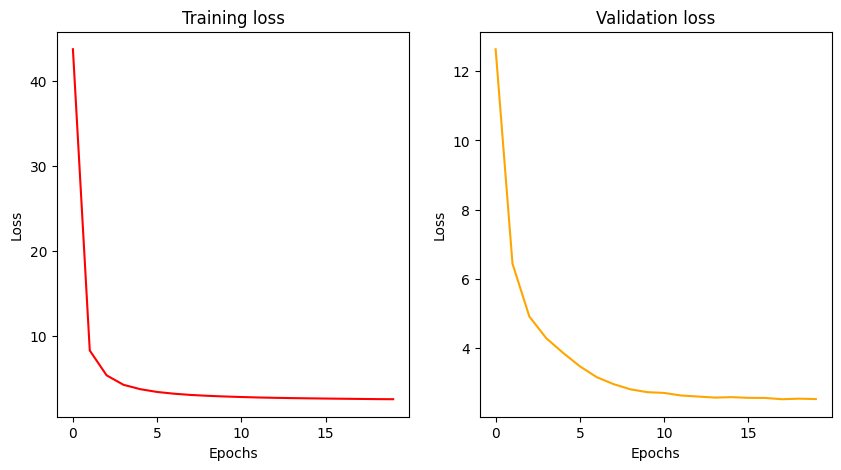

In [ ]:
train_loss = history.history['loss']# Đọc thông tin loss trên tập train
val_loss = history.history['val_loss'] # Đọc thông tin loss trên tập val

plt.figure(figsize=(10, 5)) # Cài đặt kích thước khung ảnh

plt.subplot(1, 2, 1) # Khởi tạo khung ảnh cho training loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Training loss') # Hiển thị title của khung ảnh hiện tại là 'Training Loss'
plt.plot(train_loss, color='red') # Vẽ đường giá trị loss trên tập train qua từng epoch (đường vẽ màu đỏ)

plt.subplot(1, 2, 2) # Khởi tạo khung ảnh cho val loss
plt.xlabel('Epochs') # Hiển thị tên trục hoành là 'Epochs'
plt.ylabel('Loss') # Hiển thị tên trục tung là 'Loss'
plt.title('Validation loss') # Hiển thị title của khung ảnh hiện tại là 'Validation loss'
plt.plot(val_loss, color='orange') # Vẽ đường giá trị loss trên tập val qua từng epoch (đường vẽ màu đỏ)

plt.show() # Hiển thị 2 khung ảnh nhỏ